# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –∏–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [77]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing


# –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ –∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å –Ω–∏–º

In [79]:
df = pd.read_csv('new_dfcian.csv')
df.head()

author        author_type  \
0                       ID 115709096          homeowner   
1  –°–∞–º–æ–ª—ë—Ç –ø–ª—é—Å –ü–æ–¥–º–æ—Å–∫–æ–≤—å–µ –°–µ—Ä–ø—É—Ö–æ–≤  real_estate_agent   
2                         ID 3246838            realtor   
3                        ID 64398571            unknown   
4                          –õ–ò–î–ï–†–ú–≠–ô–ù  real_estate_agent   

                                              url  location deal_type  \
0  https://serpukhov.cian.ru/sale/flat/301136001/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
1  https://serpukhov.cian.ru/sale/flat/305145433/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
2  https://serpukhov.cian.ru/sale/flat/308145954/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
3  https://serpukhov.cian.ru/sale/flat/309086009/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
4  https://serpukhov.cian.ru/sale/flat/308401669/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   

  accommodation_type floor floors_count rooms_count total_meters  ...  \
0               flat     6            6           1         20.7  ...   
1               flat     1            9           1         33.0  ...   
2               flat     4            4           1         14.0  ...   
3               flat     5            5           1         17.5  ...   
4               flat     4            7           1         25.9  ...   

  finish_type living_meters kitchen_meters        phone ceiling_height  \
0          -1         18¬†–º¬≤           1¬†–º¬≤  79175096253            3¬†–º   
1          -1         18¬†–º¬≤           6¬†–º¬≤  79645530086          2,7¬†–º   
2          -1            -1             -1  79807126116             -1   
3          -1            -1             -1  79645652380             -1   
4          -1         20¬†–º¬≤           5¬†–º¬≤  79099408093          3,5¬†–º   

                  district                street house_number underground  \
0                 –°–µ—Ä–ø—É—Ö–æ–≤               –ö—Ä—é–∫–æ–≤–∞            4         NaN   
1                      NaN            –í–æ—Ä–æ—à–∏–ª–æ–≤–∞          144      –ê–Ω–Ω–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω—ã–π –¢–µ–∫—Å—Ç–∏–ª—å—â–∏–∫ –º–∫—Ä   –ö—Ä–∞—Å–Ω—ã–π –¢–µ–∫—Å—Ç–∏–ª—å—â–∏–∫            2         NaN   
3                 –°–µ—Ä–ø—É—Ö–æ–≤           –†–æ—Å—Å–∏–π—Å–∫–∞—è            40         NaN   
4                 –°–µ—Ä–ø—É—Ö–æ–≤               –•–∏–º–∏–∫–æ–≤            8         NaN   

  residential_complex  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 27 columns]

–û—á–∏—â–∞–µ–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏, –∞ —Ç–∞–∫–∂–µ –¥—É–±–ª–∏–∫–∞—Ç—ã 

In [80]:
df.dropna(how='all')
df = df.drop_duplicates(subset=['url'], keep='first')
print(df.shape)
df

(6728, 27)


author        author_type  \
0                          ID 115709096          homeowner   
1     –°–∞–º–æ–ª—ë—Ç –ø–ª—é—Å –ü–æ–¥–º–æ—Å–∫–æ–≤—å–µ –°–µ—Ä–ø—É—Ö–æ–≤  real_estate_agent   
2                            ID 3246838            realtor   
3                           ID 64398571            unknown   
4                             –õ–ò–î–ï–†–ú–≠–ô–ù  real_estate_agent   
...                                 ...                ...   
8388                              –ú–ò–≠–õ–¨  real_estate_agent   
8389                                –ü–ò–ö          developer   
8390                        ID 47276638          homeowner   
8391                         EstateLiga  real_estate_agent   
8392                                –ü–ò–ö          developer   

                                                 url  location deal_type  \
0     https://serpukhov.cian.ru/sale/flat/301136001/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
1     https://serpukhov.cian.ru/sale/flat/305145433/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
2     https://serpukhov.cian.ru/sale/flat/308145954/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
3     https://serpukhov.cian.ru/sale/flat/309086009/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
4     https://serpukhov.cian.ru/sale/flat/308401669/  –°–µ—Ä–ø—É—Ö–æ–≤      sale   
...                                              ...       ...       ...   
8388  https://mytishchi.cian.ru/sale/flat/308939371/    –ú—ã—Ç–∏—â–∏      sale   
8389  https://mytishchi.cian.ru/sale/flat/306943495/    –ú—ã—Ç–∏—â–∏      sale   
8390  https://mytishchi.cian.ru/sale/flat/294184046/    –ú—ã—Ç–∏—â–∏      sale   
8391  https://mytishchi.cian.ru/sale/flat/304572510/    –ú—ã—Ç–∏—â–∏      sale   
8392  https://mytishchi.cian.ru/sale/flat/303513303/    –ú—ã—Ç–∏—â–∏      sale   

     accommodation_type floor floors_count rooms_count total_meters  ...  \
0                  flat     6            6           1         20.7  ...   
1                  flat     1            9           1         33.0  ...   
2                  flat     4            4           1         14.0  ...   
3                  flat     5            5           1         17.5  ...   
4                  flat     4            7           1         25.9  ...   
...                 ...   ...          ...         ...          ...  ...   
8388               flat     8           14           2         69.7  ...   
8389               flat    19           25           2         48.1  ...   
8390               flat     3            5           2         45.0  ...   
8391               flat     3            6           2         34.0  ...   
8392               flat     3           16           2         58.6  ...   

     finish_type living_meters kitchen_meters        phone ceiling_height  \
0             -1         18¬†–º¬≤           1¬†–º¬≤  79175096253            3¬†–º   
1             -1         18¬†–º¬≤           6¬†–º¬≤  79645530086          2,7¬†–º   
2             -1            -1             -1  79807126116             -1   
3             -1            -1             -1  79645652380             -1   
4             -1         20¬†–º¬≤           5¬†–º¬≤  79099408093          3,5¬†–º   
...          ...           ...            ...          ...            ...   
8388          -1         38¬†–º¬≤        10,5¬†–º¬≤  79672094035             -1   
8389    –ß–∏—Å—Ç–æ–≤–∞—è       22,7¬†–º¬≤        16,1¬†–º¬≤  74951370494         2,62¬†–º   
8390          -1            -1           6¬†–º¬≤  79153266030             -1   
8391          -1         19¬†–º¬≤           8¬†–º¬≤  79651097781         2,75¬†–º   
8392    –ß–∏—Å—Ç–æ–≤–∞—è       24,9¬†–º¬≤        21,4¬†–º¬≤  74951348120         2,62¬†–º   

                     district                street house_number underground  \
0                    –°–µ—Ä–ø—É—Ö–æ–≤               –ö—Ä—é–∫–æ–≤–∞            4         NaN   
1                         NaN            –í–æ—Ä–æ—à–∏–ª–æ–≤–∞          144      –ê–Ω–Ω–∏–Ω–æ   
2     –ö—Ä–∞—Å–Ω—ã–π –¢–µ–∫—Å—Ç–∏–ª—å—â–∏–∫ –º–∫—Ä   –ö—Ä–∞—Å–Ω—ã–π –¢–µ–

In [81]:
df[['url']].describe() # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Å–µ –ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–ª–æ–Ω–∫–µ url —É–Ω–∏–∫–∞–ª—å–Ω—ã

url
count                                             6727
unique                                            6727
top     https://serpukhov.cian.ru/sale/flat/301136001/
freq                                                 1

–£–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ–ª–æ–Ω–∫–∏

In [82]:
df.columns # –°–º–æ—Ç—Ä–∏–º –∫–æ–ª–æ–Ω–∫–∏

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

In [83]:
df.drop(['author', 'author_type', 'deal_type', 'accommodation_type', 'phone', 'house_number'], axis=1, inplace=True)
print(f"–û—Å—Ç–∞–ª–æ—Å—å {df.shape[0]} —Å—Ç—Ä–æ–∫ –∏ {df.shape[1]} –∫–æ–ª–æ–Ω–æ–∫")

–û—Å—Ç–∞–ª–æ—Å—å 6728 —Å—Ç—Ä–æ–∫ –∏ 21 –∫–æ–ª–æ–Ω–æ–∫


–£–±–∏—Ä–∞–µ–º NaN, –∞ —Ç–æ —á–µ –æ–Ω–∏ —Ä–∞—Å—Å–ª–∞–±–∏–ª–∏—Å—å 

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6728 entries, 0 to 8392
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   6727 non-null   object
 1   location              6727 non-null   object
 2   floor                 6727 non-null   object
 3   floors_count          6727 non-null   object
 4   rooms_count           6727 non-null   object
 5   total_meters          6727 non-null   object
 6   price                 6716 non-null   object
 7   year_of_construction  6727 non-null   object
 8   object_type           6727 non-null   object
 9   have_loggia           6727 non-null   object
 10  parking_type          6727 non-null   object
 11  house_material_type   6727 non-null   object
 12  heating_type          6727 non-null   object
 13  finish_type           6727 non-null   object
 14  living_meters         6727 non-null   object
 15  kitchen_meters        6727 non-null   objec

In [85]:
df.replace('-1', np.nan, inplace=True) # –ó–∞–º–µ–Ω—è–µ–º -1 (–ø—É—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏ –ø–∞—Ä—Å–∏–Ω–≥–µ) –Ω–∞ NaN

df.head(10)

url  location floor  \
0  https://serpukhov.cian.ru/sale/flat/301136001/  –°–µ—Ä–ø—É—Ö–æ–≤     6   
1  https://serpukhov.cian.ru/sale/flat/305145433/  –°–µ—Ä–ø—É—Ö–æ–≤     1   
2  https://serpukhov.cian.ru/sale/flat/308145954/  –°–µ—Ä–ø—É—Ö–æ–≤     4   
3  https://serpukhov.cian.ru/sale/flat/309086009/  –°–µ—Ä–ø—É—Ö–æ–≤     5   
4  https://serpukhov.cian.ru/sale/flat/308401669/  –°–µ—Ä–ø—É—Ö–æ–≤     4   
5  https://serpukhov.cian.ru/sale/flat/304233768/  –°–µ—Ä–ø—É—Ö–æ–≤     2   
6  https://serpukhov.cian.ru/sale/flat/304697154/  –°–µ—Ä–ø—É—Ö–æ–≤     3   
7  https://serpukhov.cian.ru/sale/flat/304332318/  –°–µ—Ä–ø—É—Ö–æ–≤     3   
8  https://serpukhov.cian.ru/sale/flat/295915722/  –°–µ—Ä–ø—É—Ö–æ–≤     1   
9  https://serpukhov.cian.ru/sale/flat/304548494/  –°–µ—Ä–ø—É—Ö–æ–≤     6   

  floors_count rooms_count total_meters    price year_of_construction  \
0            6           1         20.7  2350000                 1917   
1            9           1         33.0  4150000                 1975   
2            4           1         14.0  1700000                  NaN   
3            5           1         17.5  2500000                 1968   
4            7           1         25.9  3000000                 2009   
5            3           1         46.7  6599999                  NaN   
6            5           1         29.0  3350000                 1917   
7            6           1         19.1  3600000                 1917   
8            2           1         27.1  1900000                 1969   
9            9           2         42.7  3990000                 1980   

  object_type have_loggia  ... house_material_type heating_type finish_type  \
0    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
1    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
2    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
3    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
4    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
5    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
6    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
7    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
8    –í—Ç–æ—Ä–∏—á–∫–∞         NaN  ...                 NaN          NaN         NaN   
9    –í—Ç–æ—Ä–∏—á–∫–∞    1 –ª–æ–¥–∂–∏—è  ...                 NaN          NaN         NaN   

  living_meters kitchen_meters ceiling_height                 district  \
0         18¬†–º¬≤           1¬†–º¬≤            3¬†–º                 –°–µ—Ä–ø—É—Ö–æ–≤   
1         18¬†–º¬≤           6¬†–º¬≤          2,7¬†–º                      NaN   
2           NaN            NaN            NaN  –ö—Ä–∞—Å–Ω—ã–π –¢–µ–∫—Å—Ç–∏–ª—å—â–∏–∫ –º–∫—Ä   
3           NaN            NaN            NaN                 –°–µ—Ä–ø—É—Ö–æ–≤   
4         20¬†–º¬≤           5¬†–º¬≤          3,5¬†–º                 –°–µ—Ä–ø—É—Ö–æ–≤   
5         25¬†–º¬≤           6¬†–º¬≤            NaN                 –°–µ—Ä–ø—É—Ö–æ–≤   
6         25¬†–º¬≤            NaN            3¬†–º                 –°–µ—Ä–ø—É—Ö–æ–≤   
7           NaN            NaN            NaN                 –°–µ—Ä–ø—É—Ö–æ–≤   
8         18¬†–º¬≤           6¬†–º¬≤          2,5¬†–º                      NaN   
9       29,7¬†–º¬≤         5,6¬†–º¬≤          2,7¬†–º                 –°–µ—Ä–ø—É—Ö–æ–≤   

                 street underground residential_complex  
0               –ö—Ä—é–∫–æ–≤–∞         NaN                 NaN  
1            –í–æ—Ä–æ—à–∏–ª–æ–≤–∞      –ê–Ω–Ω–∏–Ω–æ                 NaN  
2   –ö—Ä–∞—Å–Ω—ã–π –¢–µ–∫—Å—Ç–∏–ª—å—â–∏–∫         NaN                 NaN  
3           –†–æ—Å—Å–∏–π—Å–∫–∞—è          NaN                 NaN  
4               –•–∏–º–∏–∫–æ–≤         NaN                 NaN  
5        2-—è –ú–æ—Å–∫–æ–≤—Å–∫–∞—è         NaN                 NaN  
6                –§–æ—Ä—Å—Å–

<Axes: >

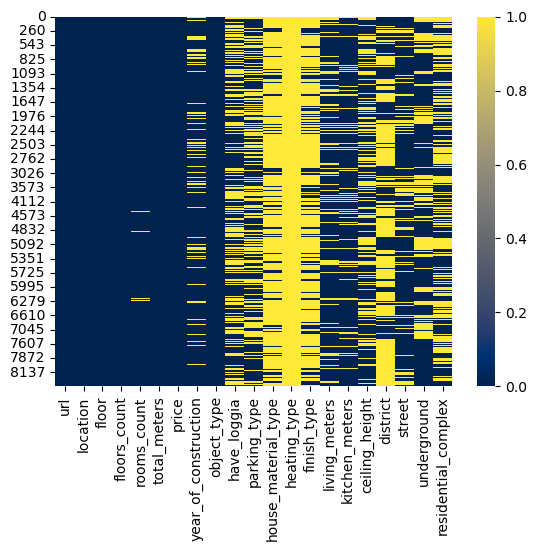

In [86]:
sns.heatmap(df.isnull(),cmap='cividis') # –°–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è


–ö–∞–∫ –≤–∏–¥–∏–º, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –ø—É—Å—Ç—ã–µ. –£–¥–∞–ª—è–µ–º –∫–æ–ª–æ–Ω–∫–∏ —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∞ —Ç–∞–∫–∂–µ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—É—Å—Ç—ã–º url, –∫–æ–ª-–≤–æ–º –∫–æ–º–Ω–∞—Ç –∏ —É–ª–∏—Ü–µ–π. –¢–∞–∫–∂–µ –∑–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞ —Å –ª–æ–¥–∂–∏–µ–π, –ø–∞—Ä–∫–æ–≤–∫–æ–π –∏ –º–µ—Ç—Ä–æ –Ω–∞ "0" - —ç—Ç–æ –∑–Ω–∞—á–∏—Ç —á—Ç–æ –∏—Ö –Ω–µ—Ç.

In [87]:
df.drop(['heating_type', 'house_material_type', 'residential_complex', 'district', 'finish_type'], axis=1,inplace=True)

df = df.dropna(subset=['url', 'rooms_count', 'street'])

df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')
df['underground'] = df['underground'].fillna('0')

print(f"C—Ç–∞–ª–æ {df.shape[1]} –∫–æ–ª–æ–Ω–æ–∫ –∏ {df.shape[0]} —Å—Ç—Ä–æ–∫")

C—Ç–∞–ª–æ 16 –∫–æ–ª–æ–Ω–æ–∫ –∏ 5240 —Å—Ç—Ä–æ–∫


/tmp/ipykernel_12835/688183491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['have_loggia'] = df['have_loggia'].fillna('0')
/tmp/ipykernel_12835/688183491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parking_type'] = df['parking_type'].fillna('0')
/tmp/ipykernel_12835/688183491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

–ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ price –∏ rooms_count –Ω–∞ NaN –∏ —Å—Ä–∞–∑—É —É–¥–∞–ª—è–µ–º –∏—Ö. –ó–∞–æ–¥–Ω–æ –º–µ–Ω—è–µ–º —Ç–∏–ø –∫–æ–ª–æ–Ω–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ª–∂–Ω—ã —Å–æ–¥–µ—Ä–∂–∞—Ç—å —á–∏—Å–ª–∞

In [88]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df['price'] = df['price'].astype(float)
df['price'].info()

df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')
df = df.dropna(subset=['rooms_count'])
df['rooms_count'] = df['rooms_count'].astype(int)

df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')



<class 'pandas.core.series.Series'>
Index: 5236 entries, 0 to 8391
Series name: price
Non-Null Count  Dtype  
--------------  -----  
5236 non-null   float64
dtypes: float64(1)
memory usage: 81.8 KB


/tmp/ipykernel_12835/1426250752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


–î–µ–ª–∞–µ–º —Å year_of_construction —Ç–æ–∂–µ —Å–∞–º–æ–µ, —á—Ç–æ –∏ —Å price. –í—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —á—É—Ç—å –ø–æ–∑–∂–µ —É–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å—ã

In [89]:
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')
df = df.dropna(subset=['year_of_construction'])
df['year_of_construction'] = df['year_of_construction'].astype(int)
print(df['year_of_construction'].dtype) 
print(df['year_of_construction'].unique())

int64
[1917 1975 1968 2009 1980 1990 2025 2015 1970 1984 1965 2010 1964 1992
 2011 1986 1994 1969 1956 1966 1973 1971 1957 2013 1981 1972 1959 2004
 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953 2008
 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926 2020
 1943 2014 2021 1967 1904 2028 1991 2018 1987 1974 1979 1988 1930 1985
 1989 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999 1983 1998
 1902 2000 1915 1910 1939 1929 1954 1897 1955 1900 1949 1947 1901 1909
 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 1935]


–§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ (–ù–∞–ø—Ä–∏–º–µ—Ä: 10 –º¬≤ -> 10). –ß—Ç–æ–±—ã –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –º–µ–¥–∏–∞–Ω–æ–π

In [90]:
def conversion_in_float(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'[^0-9.-]', '', value) # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –≤—Å–µ—Ö —Å–∏–º–≤–æ–ª–æ–≤, –∫—Ä–æ–º–µ —Ü–∏—Ñ—Ä, —Ç–æ—á–∫–∏ –∏ –º–∏–Ω—É—Å–∞.
        try:
            return float(cleaned_value)
        # –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç—Ä–æ–∫–æ–π, –æ–Ω–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
        except ValueError:
            return value
    return value

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É
df = df.apply(lambda x: x.apply(conversion_in_float))
df

url  location  floor  \
0     https://serpukhov.cian.ru/sale/flat/301136001/  –°–µ—Ä–ø—É—Ö–æ–≤      6   
1     https://serpukhov.cian.ru/sale/flat/305145433/  –°–µ—Ä–ø—É—Ö–æ–≤      1   
3     https://serpukhov.cian.ru/sale/flat/309086009/  –°–µ—Ä–ø—É—Ö–æ–≤      5   
4     https://serpukhov.cian.ru/sale/flat/308401669/  –°–µ—Ä–ø—É—Ö–æ–≤      4   
6     https://serpukhov.cian.ru/sale/flat/304697154/  –°–µ—Ä–ø—É—Ö–æ–≤      3   
...                                              ...       ...    ...   
8385  https://mytishchi.cian.ru/sale/flat/306407483/    –ú—ã—Ç–∏—â–∏     17   
8387  https://mytishchi.cian.ru/sale/flat/308342869/    –ú—ã—Ç–∏—â–∏      2   
8388  https://mytishchi.cian.ru/sale/flat/308939371/    –ú—ã—Ç–∏—â–∏      8   
8390  https://mytishchi.cian.ru/sale/flat/294184046/    –ú—ã—Ç–∏—â–∏      3   
8391  https://mytishchi.cian.ru/sale/flat/304572510/    –ú—ã—Ç–∏—â–∏      3   

      floors_count  rooms_count  total_meters       price  \
0                6            1          20.7   2350000.0   
1                9            1          33.0   4150000.0   
3                5            1          17.5   2500000.0   
4                7            1          25.9   3000000.0   
6                5            1          29.0   3350000.0   
...            ...          ...           ...         ...   
8385            17            2          52.2   9850000.0   
8387             7            2          60.0  11950000.0   
8388            14            2          69.7  11400000.0   
8390             5            2          45.0   7300000.0   
8391             6            2          34.0   6400000.0   

      year_of_construction object_type  have_loggia parking_type  \
0                     1917    –í—Ç–æ—Ä–∏—á–∫–∞          0.0     –ù–∞–∑–µ–º–Ω–∞—è   
1                     1975    –í—Ç–æ—Ä–∏—á–∫–∞          0.0          0.0   
3                     1968    –í—Ç–æ—Ä–∏—á–∫–∞          0.0          0.0   
4                     2009    –í—Ç–æ—Ä–∏—á–∫–∞          0.0     –ù–∞–∑–µ–º–Ω–∞—è   
6                     1917    –í—Ç–æ—Ä–∏—á–∫–∞          0.0     –ù–∞–∑–µ–º–Ω–∞—è   
...                    ...         ...          ...          ...   
8385                  2013    –í—Ç–æ—Ä–∏—á–∫–∞          1.0     –ù–∞–∑–µ–º–Ω–∞—è   
8387                  2017    –í—Ç–æ—Ä–∏—á–∫–∞          0.0    –ü–æ–¥–∑–µ–º–Ω–∞—è   
8388                  2018    –í—Ç–æ—Ä–∏—á–∫–∞          0.0          0.0   
8390                  1968    –í—Ç–æ—Ä–∏—á–∫–∞          1.0          0.0   
8391                  2023    –í—Ç–æ—Ä–∏—á–∫–∞          1.0     –û—Ç–∫—Ä—ã—Ç–∞—è   

      living_meters  kitchen_meters  ceiling_height              street  \
0              18.0             1.0             3.0             –ö—Ä—é–∫–æ–≤–∞   
1              18.0             6.0            27.0          –í–æ—Ä–æ—à–∏–ª–æ–≤–∞   
3               NaN             NaN             NaN         –†–æ—Å—Å–∏–π—Å–∫–∞—è    
4              20.0             5.0            35.0             –•–∏–º–∏–∫–æ–≤   
6              25.0             NaN             3.0              –§–æ—Ä—Å—Å–∞   
...             ...             ...             ...                 ...   
8385           27.0           109.0            28.0    2-—è –ò–Ω—Å—Ç–∏—Ç—É—Ç—Å–∫–∞—è   
8387           35.0            18.0           285.0  –û—Å—Ç–∞—à–∫–æ–≤—Å–∫–æ–µ —à–æ—Å—Å–µ   
8388           38.0           105.0             NaN          –Æ–±–∏–ª–µ–π–Ω–∞—è    
8390            NaN             6.0             NaN          –Æ–±–∏–ª–µ–π–Ω–∞—è    
8391           19.0             8.0           275.0    –±—É–ª—å–≤–∞—Ä –¢–µ–Ω–∏—Å—Ç—ã–π   

     underground  
0            0.0  
1         –ê–Ω–Ω–∏–Ω–æ  
3            0.0  
4            0.0  
6            0.0  
...          ...  
8385  –ú–µ–¥–≤–µ–¥–∫–æ–≤–æ  
8387  –ú–µ–¥–≤–µ–¥–∫–æ–≤–æ  
8388  –ú–µ–¥–≤–µ–¥–∫–æ–≤–æ  
8390  –ú–µ–¥–≤–µ–¥–∫–æ–≤–æ  
8391  –ú–µ–¥–≤–µ–¥–∫–æ–≤–æ  

[4168 rows x 16 columns]

–î–∞–ª–µ–µ —è —Ö–æ—á—É —É–¥–∞–ª–∏—Ç—å –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã –∏ –∞–Ω–æ–º–∞–ª–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–ª–∞–Ω–∏—Ä—É—é –∑–∞–ø–æ–ª–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å—Ç–æ–ª–±—Ü—ã –º–µ–¥–∏–∞–Ω–æ–π. –¢–∞–∫ —á—Ç–æ –¥–∞–ª–µ–µ —è –∏—â—É –∏—Ö –∏ —Å–æ–∑–¥–∞—é –±–æ–∫—Å–ø–ª–æ—Ç–∏–∫–∏ —á—Ç–æ–± –ø—Ä–∏–º–µ—Ä–Ω–æ –ø–æ–Ω—è—Ç—å, —Å –∫–∞–∫–æ–≥–æ –º–æ–º–µ–Ω—Ç–∞ –≤—ã–±—Ä–æ—Å

In [91]:
# –ò—â—É –Ω–µ–ø–æ–Ω—Ä–∞–≤–∏–≤—à–∏–µ—Å—è –º–Ω–µ —Å—Ç–æ–ª–±—Ü—ã —Å –∑–∞–≤—ã—à–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
print(df['floor'].describe())
print("\n")

print(df['floors_count'].describe())
print("\n")

print(df['rooms_count'].describe())
print("\n")

print(df['total_meters'].describe())
print("\n")

print(df['price'].describe().astype(int))
print("\n")

print(df['living_meters'].describe())
print("\n")

print(df['kitchen_meters'].describe())
print("\n")

print(df['ceiling_height'].describe().astype(int))
print("\n")

count    4168.000000
mean        7.467370
std         6.521265
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        82.000000
Name: floor, dtype: float64


count    4168.000000
mean       13.650432
std         8.804815
min         1.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        95.000000
Name: floors_count, dtype: float64


count    4168.000000
mean        1.809261
std         0.881966
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: rooms_count, dtype: float64


count    4168.000000
mean       53.708880
std        32.759614
min        14.300000
25%        36.500000
50%        46.000000
75%        61.400000
max       590.300000
Name: total_meters, dtype: float64


count          4168
mean       15284773
std        53777233
min         1500000
25%         5600000
50%         8000000
75%        11098229
max      2361200000
Name: price, dtype: int64




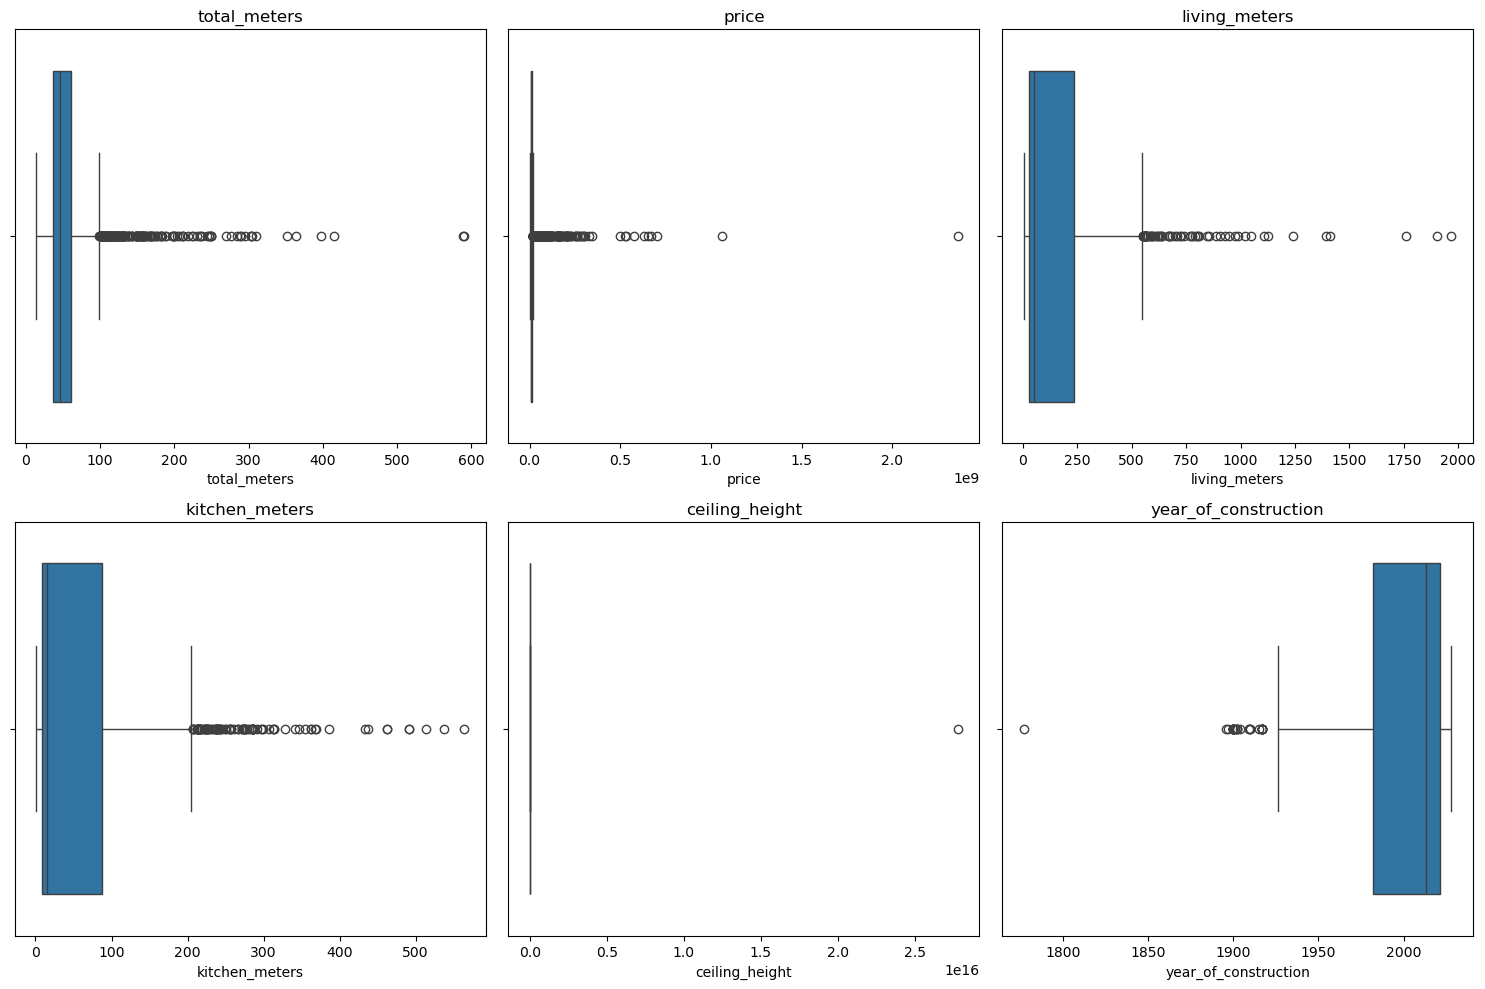

In [92]:
columnswithoutburst = df[['total_meters', 'price', 'living_meters', 'kitchen_meters', 'ceiling_height', 'year_of_construction']]
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnswithoutburst, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], orient='h')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [93]:
#–£–¥–∞–ª—è—é –≤—Å—ë –Ω–µ–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ
df = df.drop(df[(df['total_meters'] > 300)].index)
df = df.drop(df[(df['price'] > 400000000)].index)
df = df.drop(df[(df['living_meters'] > 300)].index)
df = df.drop(df[(df['kitchen_meters'] > 300)].index)
df = df.drop(df[(df['ceiling_height'] > 4)].index)
df = df.drop(df[(df['year_of_construction'] < 1950) | (df['year_of_construction'] > 2026)].index)

In [94]:
# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ—Å—Ç–∞–≤—à–µ–≥–æ—Å—è —Å—Ç–æ–ª–±—Ü–∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
df['living_meters'].fillna(df['living_meters'].mean(), inplace=True)
df['kitchen_meters'].fillna(df['kitchen_meters'].mean(), inplace=True)
df['ceiling_height'].fillna(df['ceiling_height'].mean(), inplace=True)

/tmp/ipykernel_12835/3321648024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['living_meters'].fillna(df['living_meters'].median(), inplace=True)
/tmp/ipykernel_12835/3321648024.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

–°–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏ —Ä–∞–¥—É–µ–º—Å—è ;)

<Axes: >

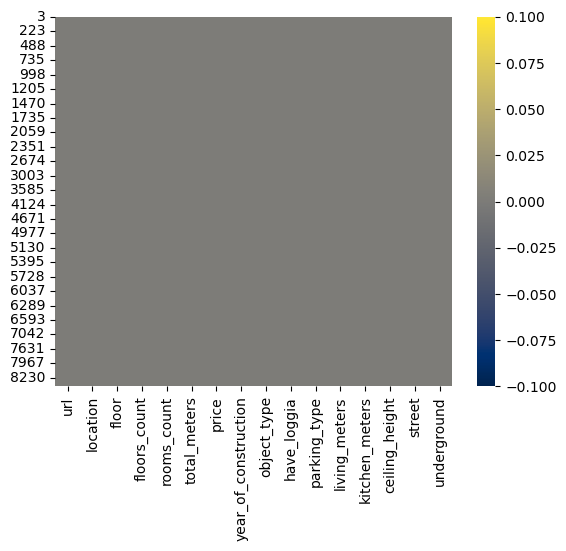

In [95]:
sns.heatmap(df.isnull(),cmap='cividis')

–ü–æ–±–µ–¥–∞! –ù–æ –∫–∞–∫–æ–π —Ü–µ–Ω–æ–π? –¶–µ–Ω–æ–π –≤—Å–µ–≥–æ...

# –ß—É—á—É—Çü§è –∫–æ–¥–∏—Ä–æ–≤–∫–∏ –∏ –∞–Ω–∞–ª–∏–∑ –æ—Ç —á–µ–≥–æ –∑–∞–≤–∏—Å–∏—Ç —Ü–µ–Ω–∞ –∑–∞ –º¬≤

In [96]:
#—É–¥–∞–ª—è—é —é—Ä–ª, –æ–Ω –Ω–µ –ø–æ–Ω–∞–¥–æ–±–∏–ª—Å—è –∏ –Ω–µ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è 
df.drop(['url'], axis=1, inplace=True)

In [97]:
# –§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è–∫–æ–¥–∏—Ä—É–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ 
def number_encode_features(init_df):
    result = init_df.copy()  # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–≤
    encoders = {}  
    
    # –°–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å
    categorical_columns = [col for col in result.columns if result[col].dtype == object]
    
    for column in categorical_columns:
        result[column] = result[column].astype(str)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç—Ä–æ–∫–∏
        encoders[column] = preprocessing.LabelEncoder()  # –°–æ–∑–¥–∞–µ–º –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞
        result[column] = encoders[column].fit_transform(result[column])  # –ü—Ä–∏–º–µ–Ω—è–µ–º –∫–æ–¥–∏—Ä–æ–≤–∫—É
    
    return result, encoders  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ —Å–ª–æ–≤–∞—Ä—å –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–≤

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫–æ –≤—Å–µ–π –∫–æ–ø–∏–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
df2, encoders = number_encode_features(df)
df2.head()

location  floor  floors_count  rooms_count  total_meters       price  \
3         26      5             5            1         17.50   2500000.0   
12        26     15            17            1         20.55   2600000.0   
18        26      2             2            1         31.30   2700000.0   
19        26      5             5            1         31.00   3090000.0   
30        26      7            24            3         77.60  12700000.0   

    year_of_construction  object_type  have_loggia  parking_type  \
3                   1968            0          0.0             0   
12                  2025            3          1.0             2   
18                  1970            0          0.0             2   
19                  1984            0          1.0             2   
30                  2011            1          1.0             0   

    living_meters  kitchen_meters  ceiling_height  street  underground  
3            35.0            11.0             3.0     457            0  
12          134.0             3.0             3.0     137            0  
18           35.0             5.0             3.0     217            0  
19           15.0            73.0             3.0      42            0  
30           35.0             5.0             3.0     331            0

–î–æ–±–∞–≤–ª—è—é —Å—Ç–æ–ª–±–µ—Ü price_per_square_meter, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ—Ç–≤–µ—Ç—Å–≤–µ–Ω–Ω–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ü–µ–Ω—É –∑–∞ –∫–≤. –º–µ—Ç—ÄüòØ

In [98]:
df2['price_per_square_meter'] = df2['price'] / df2['total_meters']
df2['price_per_square_meter'] = df2['price_per_square_meter']
df2

location  floor  floors_count  rooms_count  total_meters       price  \
3           26      5             5            1         17.50   2500000.0   
12          26     15            17            1         20.55   2600000.0   
18          26      2             2            1         31.30   2700000.0   
19          26      5             5            1         31.00   3090000.0   
30          26      7            24            3         77.60  12700000.0   
...        ...    ...           ...          ...           ...         ...   
8376        20      7             9            2         40.50   8200000.0   
8379        20     10            17            2         50.00   9500000.0   
8381        20      9            12            2         46.00   6600000.0   
8388        20      8            14            2         69.70  11400000.0   
8390        20      3             5            2         45.00   7300000.0   

      year_of_construction  object_type  have_loggia  parking_type  \
3                     1968            0          0.0             0   
12                    2025            3          1.0             2   
18                    1970            0          0.0             2   
19                    1984            0          1.0             2   
30                    2011            1          1.0             0   
...                    ...          ...          ...           ...   
8376                  1973            0          0.0             0   
8379                  2013            0          1.0             2   
8381                  1972            0          1.0             2   
8388                  2018            0          0.0             0   
8390                  1968            0          1.0             0   

      living_meters  kitchen_meters  ceiling_height  street  underground  \
3              35.0            11.0             3.0     457            0   
12            134.0             3.0             3.0     137            0   
18             35.0             5.0             3.0     217            0   
19             15.0            73.0             3.0      42            0   
30             35.0             5.0             3.0     331            0   
...             ...             ...             ...     ...          ...   
8376           35.0            56.0             3.0     432           68   
8379          271.0            11.0             3.0       4           68   
8381          275.0             6.0             3.0     469           68   
8388           38.0           105.0             3.0     511           68   
8390           35.0             6.0             3.0     511           68   

      price_per_square_meter  
3              142857.142857  
12             126520.681265  
18              86261.980831  
19              99677.419355  
30             163659.793814  
...                      ...  
8376           202469.135802  
8379           190000.000000  
8381           143478.260870  
8388           163558.106169  
8390           162222.222222  

[1255 rows x 16 columns]

–°—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –æ—Ç —á–µ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∑–∞–≤–∏—Å–∏—Ç —Ü–µ–Ω–∞ –∑–∞ –º¬≤

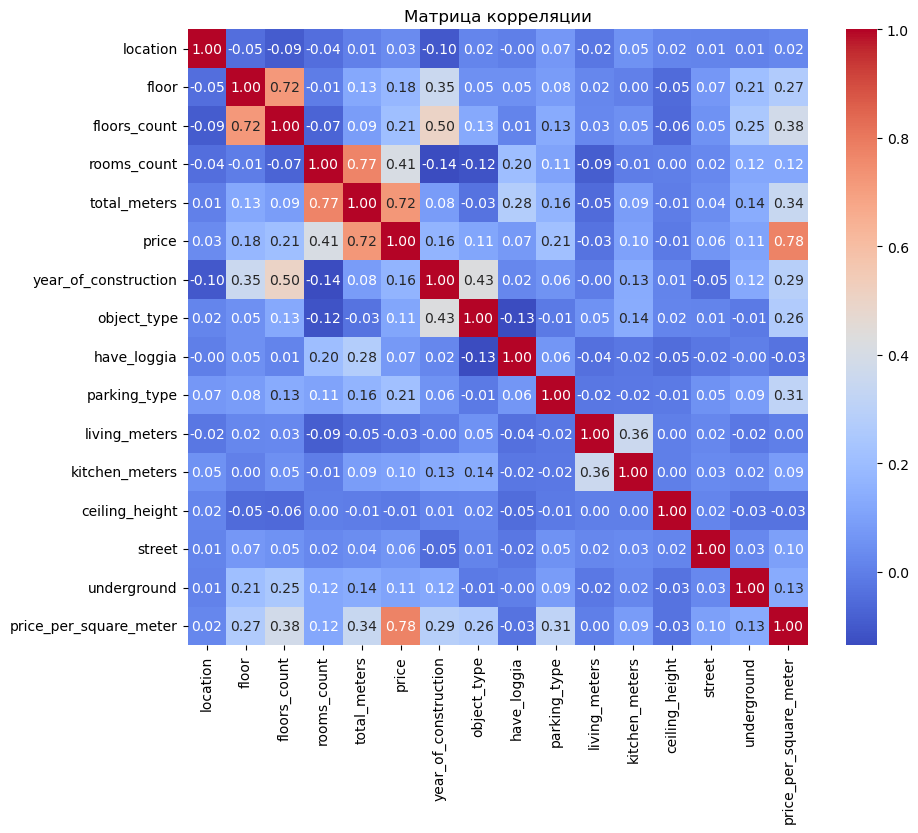

In [99]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏')
plt.show()

**–ê–Ω–∞–ª–∏–∑ –º–∞—Ç—Ä–∏—Ü—ã**:
–í–∏–¥–∏–º —á—Ç–æ –ø–æ–º–∏–º–æ —Å–∞–º–æ–π —Ü–µ–Ω—ã –∑–∞ –∫–≤. –º–µ—Ç—Ä, –ø–ª–æ—â–∞–¥–∏ –∏ —Ü–µ–Ω—ã, –Ω–∞ —Ü–µ–Ω—É –∑–∞ –∫–≤.–º–µ—Ç—Ä –≤–ª–∏—è—é—Ç —Ç–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã –∫–∞–∫: –∫–æ–ª-–≤–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ, —ç—Ç–∞–∂, –≥–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –∏ –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ä–∫–æ–≤–∫–∏. 
–í –º–µ–Ω—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –≤–ª–∏—è—é—Ç: –∫–æ–ª-–≤–æ –∫–æ–º–Ω–∞—Ç, —É–ª–∏—Ü–∞, –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –∏ –Ω–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ.

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –º—ã —É–∑–Ω–∞–ª–∏ –∫–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É –∑–∞ –∫–≤. –º–µ—Ç—Ä –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:

In [100]:
#–¥–æ–±–∞–≤–ª—è—é price_per_square_meter' –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º (—Ä–∞–Ω—å—à–µ –¥–æ–±–∞–≤–ª—è–ª –≤ –∫–æ–ø–∏—é)
df['price_per_square_meter'] = df['price'] / df['total_meters']
df['price_per_square_meter'] = df['price_per_square_meter']

/tmp/ipykernel_12835/348573446.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='floors_count', y='price_per_square_meter', palette='mako', estimator=np.mean)


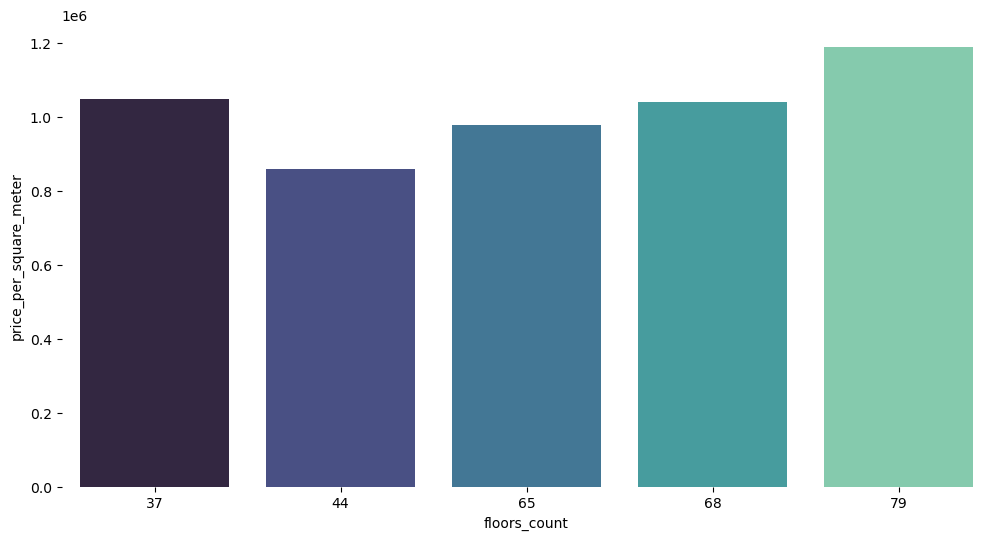

In [101]:
grafiki = df.groupby('floors_count')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='floors_count', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/3375307088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='floor', y='price_per_square_meter', palette='mako', estimator=np.mean)


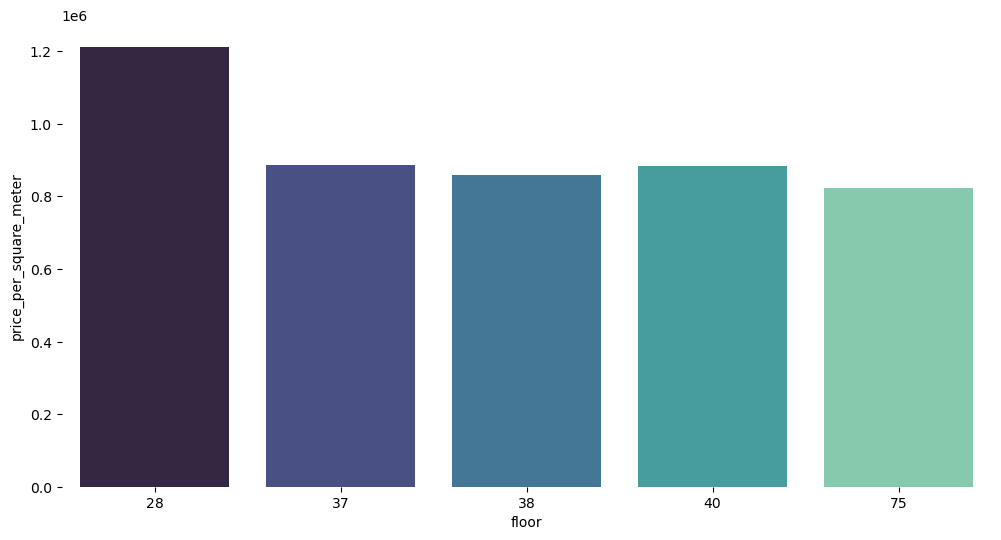

In [102]:
grafiki = df.groupby('floor')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='floor', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/2560856321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='year_of_construction', y='price_per_square_meter', palette='mako', estimator=np.mean)


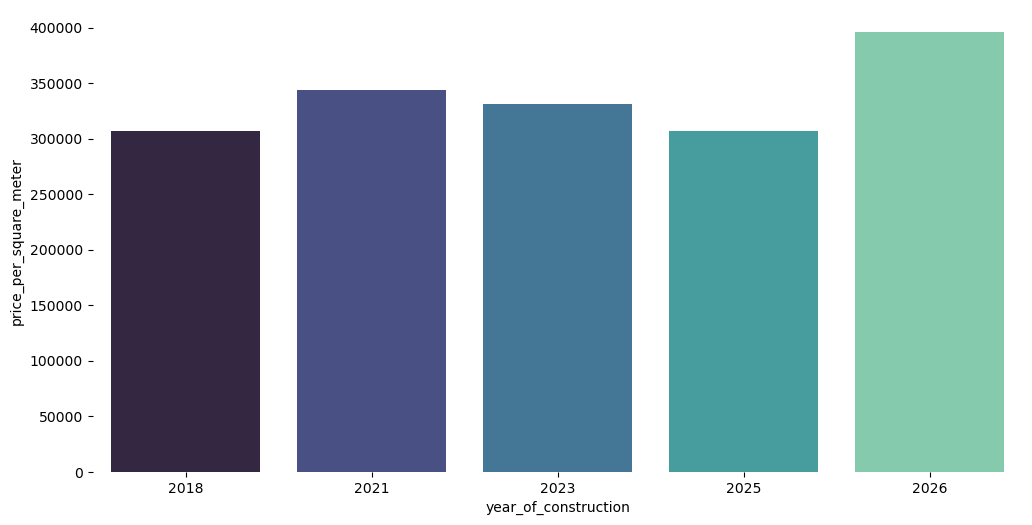

In [103]:
grafiki = df.groupby('year_of_construction')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='year_of_construction', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/98291463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='parking_type', y='price_per_square_meter', palette='mako', estimator=np.mean)


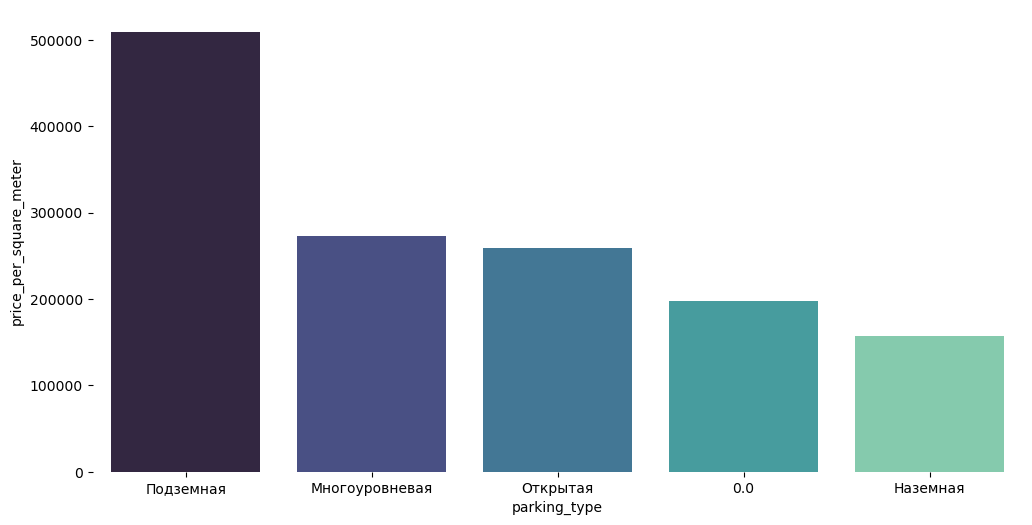

In [104]:
grafiki = df.groupby('parking_type')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='parking_type', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipykernel_12835/2815585451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x='rooms_count', y='price_per_square_meter', palette='mako', estimator=np.mean)


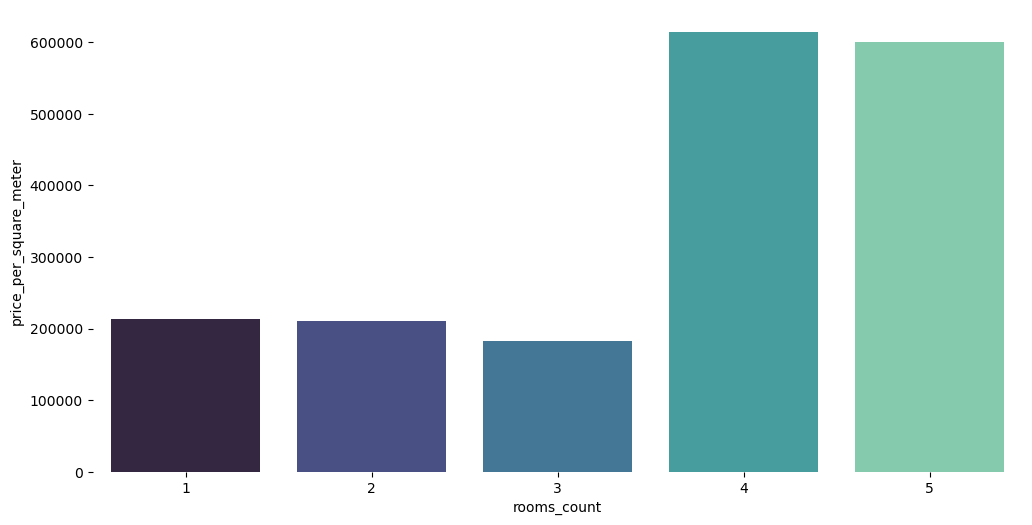

In [105]:
grafiki = df.groupby('rooms_count')['price_per_square_meter'].mean().reset_index()
top = grafiki.sort_values(by='price_per_square_meter', ascending=False).head(5)

figsize = (12, 1.2 * len(top))
plt.figure(figsize=figsize)

sns.barplot(data=top, x='rooms_count', y='price_per_square_meter', palette='mako', estimator=np.mean)
sns.despine(top=True, right=True, bottom=True, left=True)